In [1]:
import os
import pandas
import swasputils

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C7227E2B0>]],
      dtype=object)

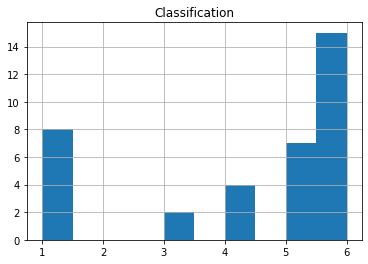

In [2]:
top_chisq = pandas.read_csv(os.path.join(swasputils.DATA_LOCATION, 'top_chisq.csv'))
top_chisq.hist(column='Classification')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C729F4E80>]],
      dtype=object)

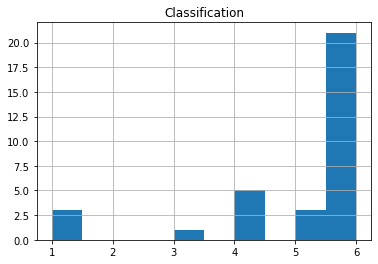

In [3]:
top_sigma = pandas.read_csv(os.path.join(swasputils.DATA_LOCATION, 'top_sigma.csv'))
top_sigma.hist(column='Classification')